In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#pandas → work with tabular data

#numpy → numeric operations

#matplotlib/seaborn → visualizations

#scikit-learn → ML models, preprocessing, evaluation

In [ ]:
df = pd.read_csv("/content/telecom_churn.csv")
df.head()

,Customer_Age,Tenure_Months,Monthly_Charges,Internet_Usage_GB,Support_Tickets,Contract_Type,Churn
0,25,12,2500,120,1,Monthly,Yes
1,32,24,3000,200,0,Yearly,No
2,45,36,4500,350,3,Monthly,Yes
3,29,18,2800,180,1,Yearly,No
4,50,48,5000,400,4,Monthly,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer_Age       30 non-null     int64 
 1   Tenure_Months      30 non-null     int64 
 2   Monthly_Charges    30 non-null     int64 
 3   Internet_Usage_GB  30 non-null     int64 
 4   Support_Tickets    30 non-null     int64 
 5   Contract_Type      30 non-null     object
 6   Churn              30 non-null     object
dtypes: int64(5), object(2)
memory usage: 1.8+ KB


In [ ]:
df.isnull().sum()

,0
Customer_Age,0
Tenure_Months,0
Monthly_Charges,0
Internet_Usage_GB,0
Support_Tickets,0
Contract_Type,0
Churn,0


In [ ]:
df.describe() #summary stats

,Customer_Age,Tenure_Months,Monthly_Charges,Internet_Usage_GB,Support_Tickets
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,36.866667,29.766667,3688.333333,262.333333,2.133333
std,8.131392,13.974566,1017.746271,105.550554,1.525266
min,24.000000,8.000000,2200.000000,100.000000,0.000000
25%,30.250000,19.250000,2912.500000,186.250000,1.000000
50%,36.000000,28.500000,3475.000000,247.500000,2.000000
75%,43.500000,39.500000,4675.000000,357.500000,3.000000
max,52.000000,60.000000,5500.000000,450.000000,5.000000


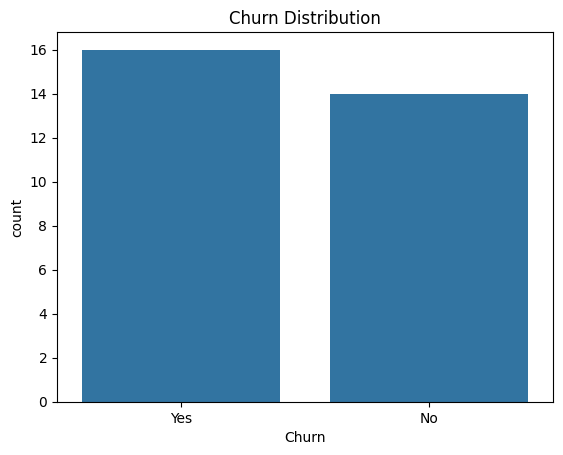

In [ ]:
sns.countplot(x='Churn', data=df) #shows distribution of churned vs active customers
plt.title("Churn Distribution")
plt.show()

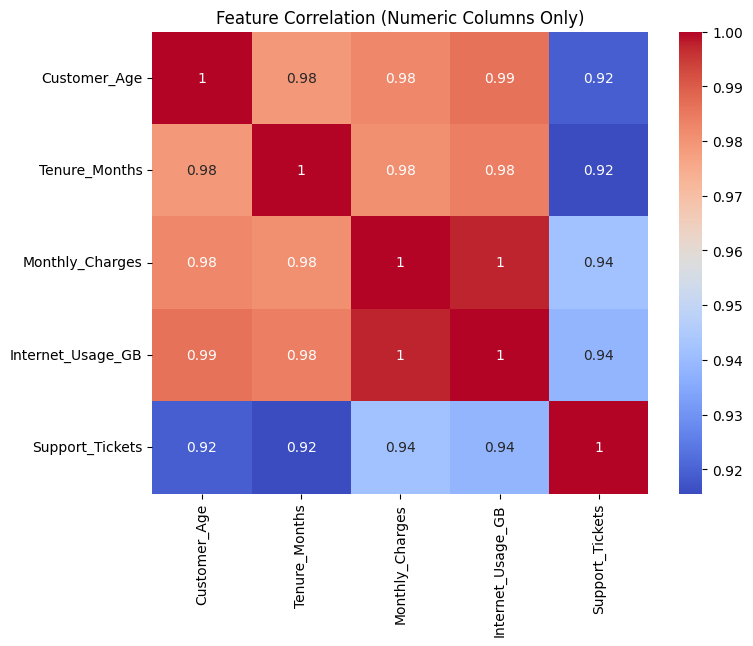

In [ ]:
plt.figure(figsize=(8,6))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=np.number)

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation (Numeric Columns Only)")
plt.show()


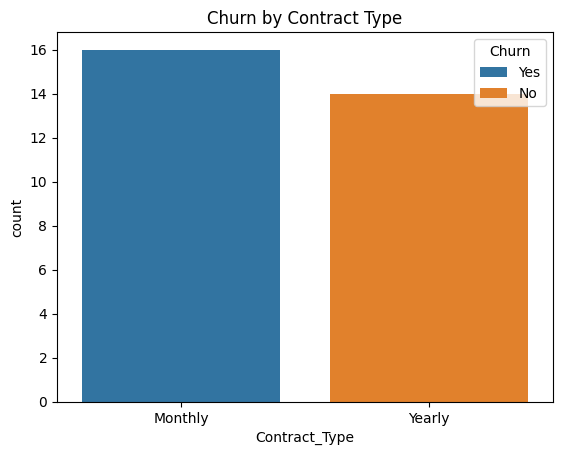

In [ ]:
sns.countplot(x='Contract_Type', hue='Churn', data=df) #shows distribution yearly vs monthly
plt.title("Churn by Contract Type")
plt.show()

In [ ]:
# Convert 'Churn' to numeric
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])  # No=0, Yes=1

# Check Contract_Type unique values
df['Contract_Type'].unique()

# One-hot encoding for Contract_Type
df = pd.get_dummies(df, columns=['Contract_Type'], drop_first=True)

# Features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
#Trains Logistic Regression
#Predicts churn on test set
#Shows accuracy

Logistic Regression Accuracy: 1.0


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))#Random Forest is powerful for tabular data Gives higher accuracy usually

Random Forest Accuracy: 1.0


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 1.0


In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 1.0


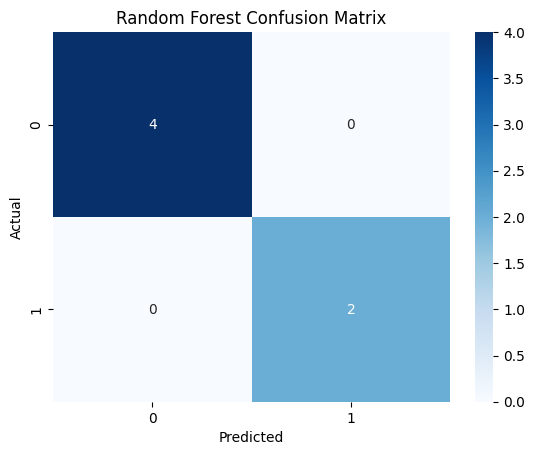

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [ ]:
# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_rf))


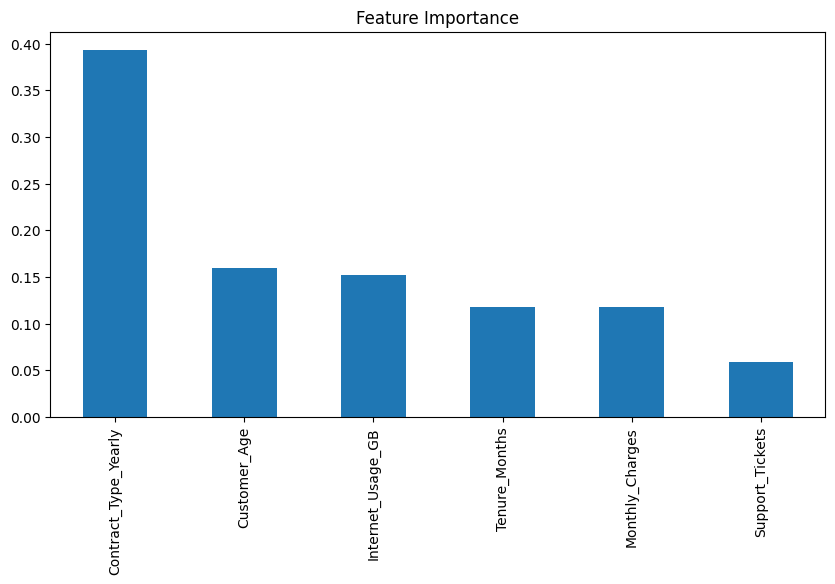

In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Feature Importance")
plt.show()


In [ ]:
import joblib
joblib.dump(rf, 'customer_churn_model.pkl')

['customer_churn_model.pkl']

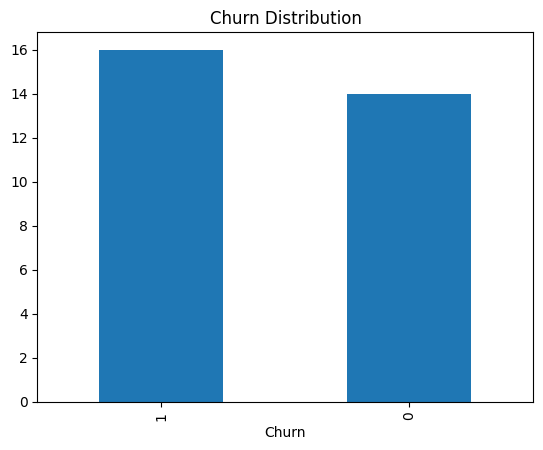

In [ ]:
df['Churn'].value_counts(normalize=True)
df['Churn'].value_counts().plot(kind='bar', title='Churn Distribution')
plt.show() #Analyzed class imbalance in churn data and adjusted modeling strategy accordingly.

In [ ]:
importances = rf.feature_importances_
features = X.columns

feature_imp_df = pd.DataFrame({
    'Feature': features,    #“WHY is the customer leaving?”
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_imp_df


,Feature,Importance
5,Contract_Type_Yearly,0.393247
0,Customer_Age,0.159636
3,Internet_Usage_GB,0.151936
1,Tenure_Months,0.118102
2,Monthly_Charges,0.117993
4,Support_Tickets,0.059086


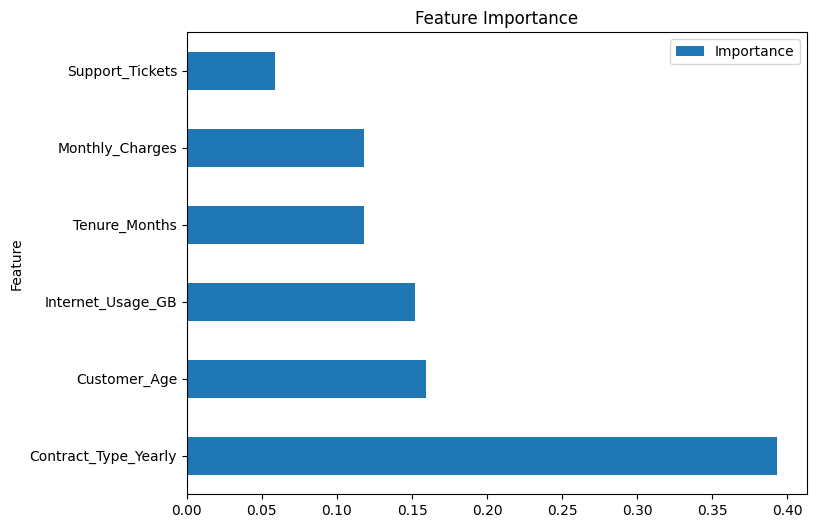

In [ ]:
feature_imp_df.plot(kind='barh', x='Feature', y='Importance', figsize=(8,6))
plt.title("Feature Importance")
plt.show() #Identified key churn drivers using feature importance analysis.

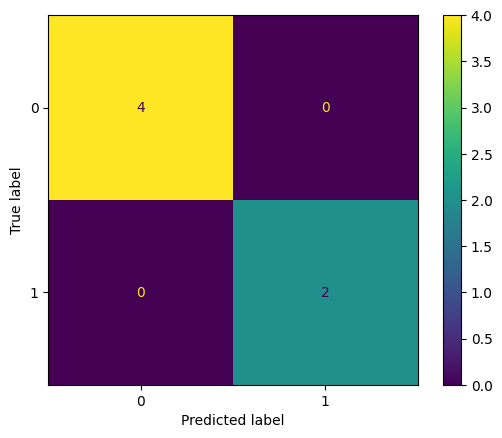

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show() #from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [ ]:
y_prob = rf.predict_proba(X_test)[:,1]

custom_threshold = 0.4
y_custom_pred = (y_prob >= custom_threshold).astype(int)#Threshold adjsutment

print(classification_report(y_test, y_custom_pred)) #Tuned prediction threshold to improve churn detection sensitivity.


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [ ]:
churners_detected = sum((y_custom_pred == 1) & (y_test == 1)) #Business Impact Simulation
avg_revenue = df['Monthly_Charges'].mean()
#Estimated business impact by calculating potential revenue savings from early churn detection.
potential_revenue_saved = churners_detected * avg_revenue
print("Estimated Monthly Revenue Saved:", potential_revenue_saved)


Estimated Monthly Revenue Saved: 7376.666666666667


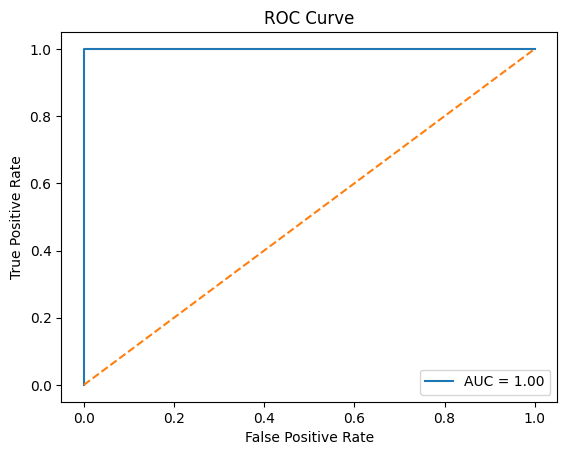

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
